In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
from Code import preproc_scores, preproc_ratings, preproc_behavior, preproc_gaze, plot_gaze

## Set paths and parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 1
if wave == 1:
    problematic_subjects = [1, 3, 12, 19, 33, 45, 46]
elif wave == 2:
    problematic_subjects = [1, 2, 3, 4, 20, 29, 64]

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

## Calculate questionnaire scores

In [5]:
file_name = [item for item in os.listdir(file_path) if (item.endswith(".xlsx") and "raw" in item)][0]
df_scores_raw = pd.read_excel(os.path.join(file_path, file_name))
df_scores_raw = df_scores_raw.loc[df_scores_raw["FINISHED"] == 1]
file_name_labbook = [item for item in os.listdir(file_path) if (item.endswith(".xlsx") and "Labbook" in item)][0]
df_labbook = pd.read_excel(os.path.join(file_path, file_name_labbook), sheet_name=f"Wave{wave}")
df_scores, problematic_subjects = preproc_scores.create_scores(df_scores_raw, df_labbook, problematic_subjects)

## Calculate rating scores

In [6]:
start = 1
vp_folder = [int(item.split("_")[1]) for item in os.listdir(file_path) if ("VP" in item)]
end = np.max(vp_folder)
vps = np.arange(start, end + 1)
vps = [vp for vp in vps if not vp in problematic_subjects]

In [7]:
df_ratings_total, problematic_subjects = preproc_ratings.create_ratings(vps, file_path, problematic_subjects, df_scores)
df_ratings = df_ratings_total.loc[~(df_ratings_total["VP"].isin(problematic_subjects))]

VP 09: Rating Friendly: 30; Rating Unfriendly: 83
VP 16: Rating Friendly: 0; Rating Unfriendly: 79
VP 28: Rating Friendly: 1; Rating Unfriendly: 36
VP 33: Rating Friendly: 36; Rating Unfriendly: 32
VP 40: Rating Friendly: 8; Rating Unfriendly: 57
VP 55: Rating Friendly: 7; Rating Unfriendly: 8
VP 62: Rating Friendly: 10; Rating Unfriendly: 1
VP 65: Rating Friendly: 19; Rating Unfriendly: 50
VP 70: Rating Friendly: 5; Rating Unfriendly: 89


In [8]:
vps = [vp for vp in vps if not vp in problematic_subjects]

In [9]:
df_scores["exclude"] = False
df_scores.loc[df_scores['ID'].isin(problematic_subjects), "exclude"] = True
df_scores.to_csv(os.path.join(file_path, 'scores_summary.csv'), index=False, decimal='.', sep=';', encoding='utf-8-sig')

In [10]:
df_ratings["exclude"] = False
df_ratings.loc[df_ratings['VP'].isin(problematic_subjects), "exclude"] = True
df_ratings.to_csv(os.path.join(file_path, 'ratings.csv'), index=False, decimal='.', sep=';')

## Preprocess behavioral data

In [11]:
df_events = preproc_behavior.get_phases(vps, file_path, wave, df_scores)
df_events = df_events.loc[~(df_events["VP"].isin(problematic_subjects))]
df_events.to_csv(os.path.join(dir_path, f'Data-Wave{wave}', 'events.csv'), decimal='.', sep=';', index=False)

no resting state for VP 50


In [12]:
df_movement, df_distance, df_dist_vh = preproc_behavior.get_distances(vps, file_path, wave, df_scores)

df_movement.to_csv(os.path.join(dir_path, f'Data-Wave{wave}', 'movement.csv'), decimal='.', sep=';', index=False)
df_distance.to_csv(os.path.join(dir_path, f'Data-Wave{wave}', 'walking_distance.csv'), decimal='.', sep=';', index=False)
df_dist_vh.to_csv(os.path.join(dir_path, f'Data-Wave{wave}', 'distance_vh.csv'), decimal='.', sep=';', index=False)

 71%|███████   | 34/48 [51:45<21:21, 91.55s/it] 

no resting state for VP 50


100%|██████████| 48/48 [1:12:52<00:00, 91.10s/it]


## Preprocess gaze and pupil data

In [21]:
df_gaze, df_pupil, df_pupil_interaction = preproc_gaze.get_gaze(vps, file_path, wave, df_scores)

df_gaze.to_csv(os.path.join(file_path, 'gaze.csv'), decimal='.', sep=';', index=False)
df_pupil.to_csv(os.path.join(file_path, 'pupil.csv'), decimal='.', sep=';', index=False)
df_pupil_interaction.to_csv(os.path.join(file_path, 'pupil_interaction.csv'), decimal='.', sep=';', index=False)

 71%|███████   | 34/48 [00:45<00:18,  1.35s/it]

no resting state for VP 50


100%|██████████| 48/48 [01:04<00:00,  1.34s/it]


C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\plot_gaze.py:70: PerformanceWarning: indexing past lexsort depth may impact performance.
  reference = df_cal_all_agg.loc[(df_cal_all_agg[("time",)] == "Start") & (df_cal_all_agg[("position",)] == position)]
C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\plot_gaze.py:70: PerformanceWarning: indexing past lexsort depth may impact performance.
  reference = df_cal_all_agg.loc[(df_cal_all_agg[("time",)] == "Start") & (df_cal_all_agg[("position",)] == position)]
C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\plot_gaze.py:70: PerformanceWarning: indexing past lexsort depth may impact performance.
  reference = df_cal_all_agg.loc[(df_cal_all_agg[("time",)] == "Start") & (df_cal_all_agg[("position",)] == position)]
C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\plot_gaze.py:70: PerformanceWarning: indexing past lexsort depth may impact performance.
  reference = df_ca

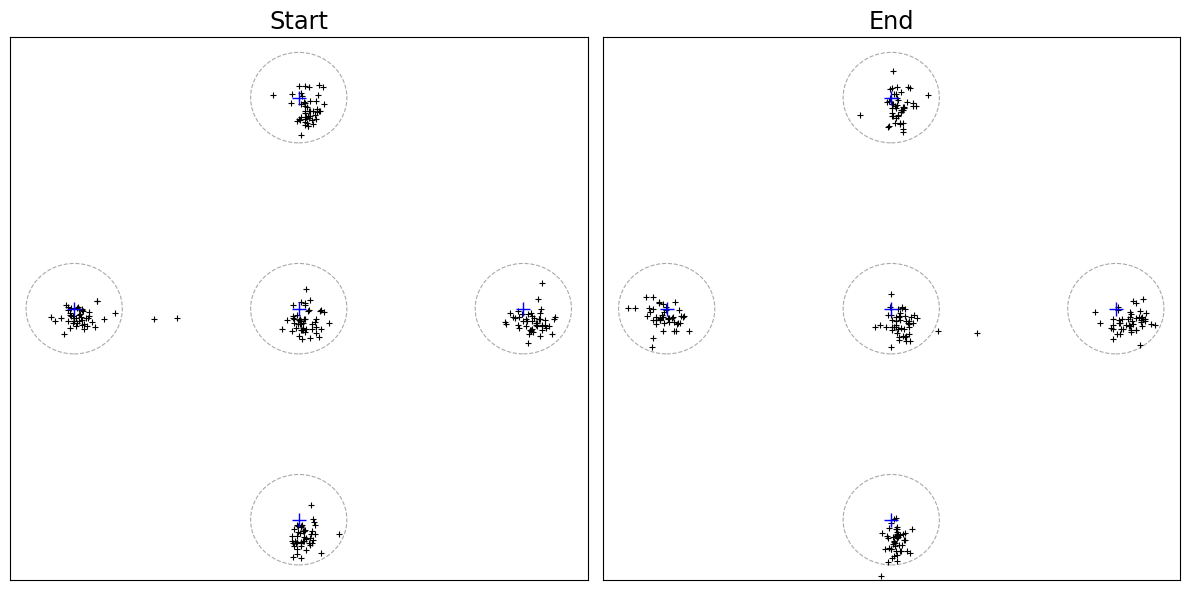

In [12]:
plot_gaze.plot_et_validation(vps, file_path)
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Gaze')
if not os.path.exists(save_path):
    print('creating path for saving')
    os.makedirs(save_path)
plt.savefig(os.path.join(save_path, f"et_calibration.png"), dpi=300)

## Preprocess EDA

In [ ]:
try:
    df_eda = pd.read_csv(os.path.join(file_path, 'eda.csv'), decimal='.', sep=';')
    print("existing eda.csv found")
    vps_eda = list(df_eda["VP"].unique())
except:
    print("no existing eda.csv found")
    vps_eda = []
    
if set(vps).issubset(vps_eda):
    print("EDA of all included subjects already processed")
else:
    %run preproc_eda {wave} {file_path}

## Preprocess ECG

In [ ]:
# TODO: Adapt subjects with bad signal quality in preproc_ecg.py script
try:
    df_hr = pd.read_csv(os.path.join(file_path, 'hr.csv'), decimal='.', sep=';')
    print("existing hr.csv found")
    vps_hr = list(df_hr["VP"].unique())
except:
    print("no existing hr.csv found")
    vps_hr = []

if set(vps).issubset(vps_hr):
    print("Heart Rate of all included subjects already processed")
else:
    %run preproc_ecg {wave} {file_path}